In [3]:
import numpy as np
from scipy.optimize import minimize


def f(a, b, c, d, t):
    return a * t**3 + b * t**2 + c * t + d

def f_prime(a, b, c, d, t):
    return  3*a*t**2 + 2*b*t + c

def f_double_prime(a, b, c, d, t):
    return  3*2*a*t+2*b


# Differential equation parameters
ws = 376.9911
# Boundary condition 
coefii = 10

# del_0 = 0  #del
# omega_0 = 0     #w
del_0_v = -1/coefii
omega_0_v = 383.9911/coefii

K1 = 5/coefii
K2 = 10/coefii
K3 = 1.7/coefii
ws = ws/coefii
def DE(f,f_prime,f_double_prime,t):
    delta = f
    delta_prime = f_prime
    omega = delta_prime+ws
    omega_prime = f_double_prime
    return (delta_prime+ws-omega)+omega_prime-K1+K2*np.sin(coefii*delta)+K3*(-ws+omega)*coefii
    

n_grid = 10
range_min =0
range_max = 0.2
t_data = np.linspace(range_min, range_max, n_grid)
dt = t_data[1]-t_data[0]
# print(dt)
print(t_data)

# del_target_values = [-0.1, -0.09295783800057646, -0.08590468113826105, -0.0788451796957863, -0.07178422957853843, -0.06472697231455782, -0.05767879505453857, -0.05064533057182887, -0.043632372134778316, -0.03664580324507336, -0.029691717290979018, -0.022776158649917357, -0.01590511341293927, -0.00908450938472434, -0.0023202160835802538, 0.004381955258555435, 0.011016252188974375, 0.017577178974258298, 0.024059506659185673, 0.030458199807511556, 0.03676852394640574, 0.04298604556645252, 0.049106632121651166, 0.05512645202941507, 0.06104197467057247, 0.06684997038936709, 0.07254747874719236, 0.07813182347310517, 0.08360102239850224, 0.08895340783506495, 0.09418757092990773, 0.09930236166557811, 0.10429688886005666, 0.109170520166757, 0.1139228820745261, 0.11855385990764342, 0.12306359782582217, 0.1274524988242081, 0.13172122473338016, 0.13587069621935108, 0.13990207650488148, 0.1438164879795766, 0.1476153796651598, 0.15130038102785082, 0.1548731853743602, 0.15833554985188938, 0.16168929544813068, 0.16493630699126724, 0.16807853314997293, 0.1711179864334126, 0.17405674319124195, 0.17689694361360753, 0.17964079173114655, 0.18229055541498737, 0.1848485663767492, 0.18731721422710823, 0.18969880405820402, 0.19199550843119392, 0.19420947029110747, 0.19634280725981793, 0.19839761163604197, 0.20037595039534015, 0.20227986519011637, 0.2041113723496184, 0.20587246287993746, 0.20756510246400853, 0.20919123146161003, 0.2107527649093642, 0.21225159252073672, 0.2136895786860371, 0.2150685624724183, 0.2163903576238769, 0.2176567525612532, 0.21886951038223096, 0.22003036886133792, 0.22114104044994506, 0.22220313697613772, 0.22321797372160765, 0.22418685912253414, 0.22511107761168167, 0.22599188477369336, 0.22683050734509105, 0.22762814321427535, 0.22838596142152545, 0.22910510215899935, 0.22978667677073364, 0.2304317677526437, 0.23104142875252362, 0.23161668457004614, 0.23215853115676266, 0.2326679356161034, 0.2331458362033772, 0.23359314232577164, 0.23401073454235294, 0.23439946456406607, 0.2347601552537347, 0.23509360062606122, 0.2354005665750903, 0.2356817232576276, 0.2359376219794031, 0.23616879302289065, 0.23637575151156062, 0.2365589974098797, 0.2367190155233112, 0.23685627549831476, 0.23697123182234647, 0.23706432382385895, 0.23713597567230116, 0.2371865963781186, 0.23721657979275318, 0.23722630460864325, 0.23721613435922362, 0.23718641741892557, 0.2371374870031768, 0.23706966116840145, 0.2369832428120201, 0.23687851967244988, 0.23675576432910422, 0.2366152342023931, 0.23645717155372295, 0.23628180348549657, 0.23608934184067482, 0.23587994606303977, 0.2356537009947777, 0.2354106827744363, 0.23515096062416144, 0.23487459684969714, 0.2345816468403855, 0.23427215906916687, 0.23394617509257973, 0.23360372955076067, 0.2332448501674445, 0.23286955774996412, 0.23247786618925068, 0.23206978245983334, 0.23164530661983956, 0.23120443181099484, 0.23074714425862297, 0.23027342327164577, 0.22978324124258323, 0.22927656364755358, 0.22875334904627312, 0.22821354908205632, 0.22765710848181586, 0.22708396505606254, 0.22649404969890527, 0.22588728638805114, 0.2252635921848056, 0.22462287723407176, 0.2239650450848102, 0.22329006636498888, 0.22259783068204175, 0.2218881457298547, 0.2211608221286189, 0.2204156734248307, 0.21965251609129172, 0.21887116952710878, 0.21807145605769393, 0.21725320093476447, 0.216416232336343, 0.2155603813667572, 0.21468548205664018, 0.21379137136293003, 0.21287788916887035, 0.21194487828400968, 0.21099218444420212, 0.2100196563116067, 0.20902714547468795, 0.2080145064482154, 0.20698159667326396, 0.20592827651721368, 0.20485440927374984, 0.20375986116286315, 0.20264450133084932, 0.20150820185030946, 0.20035083772014967, 0.1991722868655814, 0.1979724301381216, 0.19675115131559215, 0.1955083371021203, 0.19424387712813806, 0.19295766395038358, 0.19164959305189996, 0.19031956435115396, 0.18896749552333902, 0.18759331283159636, 0.18619695744787554, 0.18477838764214924, 0.18333757878241322, 0.18187452333468643, 0.18038923086301095, 0.17888172802945201, 0.17735205859409794, 0.17580028341506015, 0.1742264804484733, 0.17263074474849524, 0.17101318846730673, 0.1693739408551119, 0.1677131482601378, 0.16603097412863455]
# omega_target_values = [38.39911, 38.40042273496553, 38.40129323066561, 38.40168948082066, 38.40158293668329, 38.400948507038315, 38.399764558202705, 38.39801291402565, 38.39567904538794, 38.392752851437734, 38.38922818707857, 38.3851027878877, 38.38037827790198, 38.375060169617925, 38.36915786399165, 38.362684650438936, 38.35565770067475, 38.34809622817271, 38.34002316265093, 38.33146460177351, 38.32244800602715, 38.31300219872114, 38.3031573659874, 38.292945056780425, 38.28239818287731, 38.271551018877766, 38.260438570631464, 38.24909305419324, 38.237548779974986, 38.22583938779197, 38.21399715939486, 38.20205301846968, 38.19003653063787, 38.177975903456264, 38.165897986417086, 38.15382827094793, 38.14179089041181, 38.12980862010712, 38.117902877267625, 38.106093721062514, 38.09439985219996, 38.082837872224, 38.0714214084813, 38.060162755102056, 38.04907311934895, 38.03816262161714, 38.02744029543428, 38.01691408746053, 38.0065908574885, 37.996476378443305, 37.98657533638256, 37.97689133049634, 37.96742687310724, 37.95818338967032, 37.94916121877313, 37.94035993636704, 37.931780413574636, 37.923421155748834, 37.915279940911056, 37.907354363004565, 37.89964183189449, 37.89213957336777, 37.88484462913322, 37.87775385682147, 37.87086392998502, 37.86417133809819, 37.857672386557155, 37.85136319667994, 37.845239705706405, 37.83929766679825, 37.83353264903903, 37.827940037434125, 37.82251503291078, 37.817252652318075, 37.81214772842693, 37.807194909930104, 37.80238917948226, 37.79772681147687, 37.79320353938548, 37.78881510677731, 37.784557309457114, 37.78042599546526, 37.776417065077666, 37.772526470805836, 37.76875021739684, 37.76508436183335, 37.761525013333575, 37.758068333351325, 37.754710535575974, 37.75144788593248, 37.74827670258136, 37.74519335591873, 37.742194268576256, 37.7392759154212, 37.736434823556394, 37.733667572320236, 37.7309707932867, 37.72834119131558, 37.725775862714656, 37.72327222404992, 37.72082774153344, 37.71843992306344, 37.716106318224305, 37.71382451828656, 37.71159215620686, 37.70940690662805, 37.70726648587908, 
# 37.7051686519751, 37.703111204617365, 37.701091985193294, 37.69910887677647, 37.697159804126606, 37.69524273368957, 37.693355673597374, 37.691496673668205, 37.68966382540637, 37.68785526200234, 37.68606915833272, 37.684303730960295, 37.68255723813397, 37.68082797978881, 37.67911429851505, 37.67741480505647, 37.675728294493204, 37.67405350324869, 37.67238919232862, 37.670734147321, 37.66908717839606, 37.66744712030637, 37.66581283238673, 37.664183198554234, 37.66255712730826, 37.660933551730466, 37.659311429484774, 37.65768974281739, 37.6560674985568, 37.654443728113776, 37.65281748748135, 37.65118785723484, 37.64955394253185, 37.64791487311225, 37.6462698032982, 37.644617911994125, 37.64295840268674, 37.64129050344502, 37.639613466920245, 37.637926570345954, 37.636229115537965, 37.634520428894376, 37.632799862616466, 37.63106713961512, 37.62932194552478, 37.62756373782055, 37.62579201777482, 37.62400633045732, 37.622206264735084, 37.620391453272475, 37.61856157253116, 37.61671634277015, 37.61485552804574, 37.61297893621156, 37.61108641891858, 37.609177871615046, 37.60725323354656, 37.60531248775601, 37.60335566108362, 37.60138282416694, 37.599394091440814, 37.59738962113743, 37.59536961528627, 37.59333431971416, 37.59128402404522, 37.5892190617009, 37.58713980989997, 37.58504668965852, 37.582940165789935, 37.58082074690495, 37.5786889854116, 37.576545477515246, 37.57439086321856, 37.572225826321535, 37.57005109442148, 37.567867438913034, 37.56567574426206, 37.56347748182105, 37.56127387997901, 37.55906613912006, 37.556855536967106, 37.55464342858181, 37.55243124636462, 37.55022050005472, 37.548012776730104, 37.545809740807506, 37.54361313404244, 37.54142477552919, 37.5392465617008, 37.53708046632909, 37.534928540524646, 37.53279291273683, 37.53067578875376]

# del_target_values = [-0.1, -0.08568864375010266, -0.07135199292327042, -0.05703216366155178, -0.04277533332758968, -0.028630566403092566, -0.014648393492369936, -0.0008786099410683636, 0.012629993562057113, 0.025830965225360485, 0.03868190003112095, 0.05114514907683676, 0.06318818053413534, 0.07478349631699908, 0.08590929364185632, 0.09655108128205876, 0.10669910851327256, 0.11634802541217151, 0.12549688285643618, 0.13414913252475494, 0.1423124546002818, 0.14999727816970396, 0.1572170147933966, 0.16398646160587024, 0.17032150117763253, 0.17623910151518826, 0.18175731606103976, 0.18689528211221512, 0.19167252338163385, 0.1961073022258, 0.2002172705183872, 0.2040196495808423, 0.20753123018238517, 0.21076837254000894, 0.21374700631847987, 0.2164826306303374, 0.21899031403589397, 0.22128469454323552, 0.2233792634241711, 0.22528520015009165, 0.22701309424038968, 0.22857304585789437, 0.22997466468065175, 0.2312270699019247, 0.23233889023019288, 0.23331826388915283, 0.23417283861771784, 0.2349097716700181, 0.2355355471757422, 0.23605508170803655]
# omega_target_values = [38.39911, 38.40131255162024, 38.401559501400065, 38.399627615014815, 38.39535272010845, 38.38863569037213, 38.37944575798523, 38.36781828175373, 38.35385457506316, 38.33771250498817, 38.31960064799821, 38.29975795463622, 38.27844654658136, 38.25594953663366, 38.232548774138536, 38.20852344187769, 38.184133101993716, 38.15961422638989, 38.135180196730154, 38.11102130443908, 38.0873045267779, 38.0641648590319, 38.04170495996719, 38.020008128295665, 37.999139183467754, 37.979144465672405, 37.96005183583712, 37.94187079269068, 37.92460193204962, 37.90823330461032, 37.892744190413474, 37.87811073974539, 37.864305973137945, 37.851299781368624, 37.83905892546051, 37.82754703668229, 37.816724616548235, 37.80654903681822, 37.7969789305147, 37.78797953688034, 37.779515522995986, 37.77155243468513, 37.76405670589686, 37.75699565870589, 37.75033750331248, 37.744051338042496, 37.73810714934741, 37.73247581180426, 37.72712975291509, 37.7220465421391]

del_target_values = [-0.1, -0.08441470937506322, -0.0688037423854327, -0.053222192928088295, -0.03773062311181606, -0.02239321114539309, -0.007274950946655793, 0.007560493585276482, 0.02205150309138274, 0.036141699867384636]
omega_target_values = [38.39911, 38.40141738637016, 38.40138078522379, 38.39872210442563, 38.39324723381016, 38.3848559990875, 38.37354286389266, 38.35939520883024, 38.34258932254494, 38.323369741858244]


def callbackF(parameters):
    # global current_loss

    print("Current loss:", loss(parameters)) 


def loss(params):
    a, b, c, d = params
    u = np.zeros(n_grid + 2)
    u[0] = f(a, b, c, d, range_min - dt)
    u[1] = del_0_v
    for i in range(1, n_grid):
        u[i + 1] = f(a, b, c, d, t_data[i])
    u[n_grid + 1]=f(a, b, c, d, range_max + dt)  
    
    u_prime = (u[2:] - u[:-2])/(2*dt)
    omega_0 = u_prime[0]+ws
    u_double_prime = (u_prime[2:] - u_prime[:-2])/(2*dt)
    # u_prime = f_prime(a, b, c, d,t_data)
    # u_double_prime = f_double_prime(a, b, c, d,t_data)

    loss_i = np.sum((DE(f=u[2:-2],f_prime=u_prime[1:-1],f_double_prime=u_double_prime,t=t_data[1:-1]))**2)
    # loss_i = np.sum(np.abs(DE(f=u,f_prime=u_prime,f_double_prime=u_double_prime,t=t_data)))

    eta = 5
    # del0_pred = f(a, b, c, d, 0)
    # omega0_pred = f_prime(a, b, c, d, 0) + ws
    # loss_b = eta * (del_0_v - del0_pred) ** 2 * len(t_data)
    loss_b = 0
    loss_b += eta * (omega_0_v - omega_0) ** 2 * len(t_data)

    # loss = 10*loss_i+8*loss_b
    loss = loss_i+loss_b
    # loss = loss_i
    # print("Current loss:", loss) 
    return loss



initial_params = [1, 2, 3,4]
# initial_params = [4, 4, 4,4]
# initial_params = [10, 20, 8,70]
# initial_params = [1.5703050481447, 6.664583545312459, 8.490607793546264,-1.0593486531798044]
# initial_params = [0.17749722218115743, -0.6981313539613472, 0.8622182932697816,-0.1070692270857497]

# result = minimize(loss, initial_params, method='Nelder-Mead')
result = minimize(loss, initial_params, callback=callbackF, method='BFGS', options={'gtol': 1E-2})

a, b, c,d = result.x


print("Optimized a:", a)
print("Optimized b:", b)
print("Optimized c:", c)
print("Optimized d:", d)

[0.         0.02222222 0.04444444 0.06666667 0.08888889 0.11111111
 0.13333333 0.15555556 0.17777778 0.2       ]
Current loss: 2435738.9286264954
Current loss: 2227471.8764015003
Current loss: 2135744.7760492833
Current loss: 1309067.9396152594
Current loss: 192939.50556244567
Current loss: 318.20560146118504
Current loss: 10.12341870773663
Current loss: 0.17052952732621102
Current loss: 0.018623442279874093
Current loss: 0.0007786079794886486
Current loss: 0.0002610740497464435
Current loss: 0.0002478289350562904
Current loss: 0.00024781126298430113
Optimized a: -0.9410957183597627
Optimized b: 0.09237353205848453
Optimized c: 0.7004552365267431
Optimized d: -0.10001392987246853


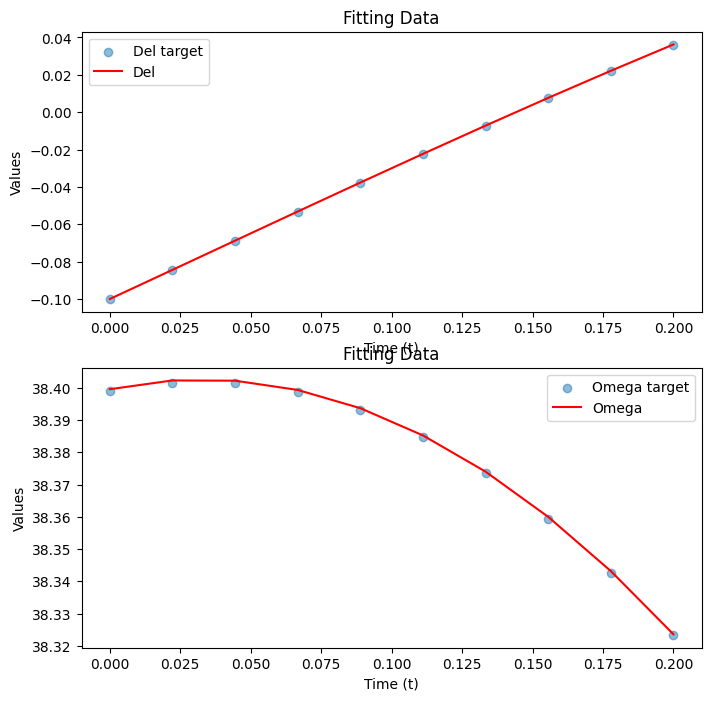

In [4]:
import matplotlib.pyplot as plt

# Plot the target values and the fitted curve
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.scatter(t_data, del_target_values, label='Del target', alpha=0.5)
fitted_values = f(a, b, c, d,t_data)
plt.plot(t_data, fitted_values, 'r', label='Del')
plt.xlabel('Time (t)')
plt.ylabel('Values')
plt.legend()
plt.title('Fitting Data')


# Plot the target values and the fitted curve
# plt.figure(figsize=(8, 6))
plt.subplot(2, 1, 2)
plt.scatter(t_data, omega_target_values, label='Omega target', alpha=0.5)
fitted_values = f_prime(a, b, c, d,t_data)+ws
plt.plot(t_data, fitted_values, 'r', label='Omega')
plt.xlabel('Time (t)')
plt.ylabel('Values')
plt.legend()
plt.title('Fitting Data')
plt.show()

plt.show()
